# Imports Section 

In [7]:
import sys
sys.path.append("../notebooks/scripts/")

In [58]:
sns.set_style("ticks")
# Disable top and right spines.
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
# Display and save figures at higher resolution for presentations and manuscripts.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 100
# Display text at sizes large enough for presentations and manuscripts.
mpl.rcParams['font.weight'] = "normal"
mpl.rcParams['axes.labelweight'] = "normal"
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 8
mpl.rc('text', usetex=False)

In [8]:
import altair as alt
from altair_saver import save
from augur.utils import json_to_tree
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
import sys
from Helpers import get_euclidean_data_frame
from sklearn.metrics import confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import re
#from reportlab.graphics import renderPDF
import seaborn as sns
#from svglib.svglib import svg2rlg

from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from Helpers import linking_tree_with_plots_clickable, linking_tree_with_plots_brush, scatterplot_with_tooltip_interactive
from Helpers import get_y_positions

%matplotlib inline

# Global Variables

In [206]:
methods = ["pca", "mds", "t-sne", "umap"]
#diseases = ["seasonal-flu-nextstrain", "seasonal-flu-nextstrain-2018-2020", "zika-nextstrain", "mers-nextstrain", "sars-cov-2-nextstrain"]
table = "../seasonal-flu-nextstrain/results/table.tsv"
threshold_df = pd.read_csv("../seasonal-flu-nextstrain/results/full_KDE_metadata.csv")

In [54]:
def _get_embedding_columns_by_method(method):
    if method in ("pca"):
        return list(f"{method}1 {method}2 {method}3 {method}4 {method}5 {method}6 {method}7 {method}8 {method}9 {method}10".split())
    if method in ("mds"):
        return list(f"{method}1 {method}2".split())
    if method in ("t-sne"):
        return list("tsne_x tsne_y".split())
    else:
        return list(f"{method}_x {method}_y".split())

In [ ]:

random_state = 12883823
rkf = RepeatedKFold(n_splits=2,  n_repeats=args.n_repeats, random_state=random_state)
k = 0
total_list_methods = []

for training_index, validation_index in rkf.split(sequence_names): 
    i = 0
        print("here " + str(k))
        for embed in default_tuned_values:
            print(i)
        # Calculate Euclidean distance between pairs of samples in the embedding.
        # The output is a condensed distance matrix with distances between pairs.
        # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
            scaler = StandardScaler()
            if(list_of_embedding_strings[i] == "PCA"):
                #performing PCA on my pandas dataframe
                numbers_subset = numbers[training_index]
                print(numbers_subset)
                print(set(training_index))
                pca = PCA(**embed) #can specify n, since with no prior knowledge, I use None
                training_embedding = pca.fit_transform(numbers_subset)
            else:
                # Subset distance matrix to training indices.
                training_distance_matrix = distance_matrix[training_index][:, training_index]

                # Embed training distance matrix.
                embedder = embedding_class[i](**embed)
                training_embedding = embedder.fit_transform(training_distance_matrix)
                

In [207]:
node_df = pd.read_csv(table, sep="\t")
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

distance_thresholds = np.arange(0,30,2)

In [127]:
i=0
full_output = []
dataframes_total = []
for method in methods:
    print(method)
    embedding_df = pd.read_csv(f"../seasonal-flu-nextstrain/results/embed_{method}_sequences.csv")
    embedding_df = embedding_df.drop(f"{method}_label", axis=1)
    val_df = node_df[["strain", "clade_membership", "y", "date"]].merge(embedding_df, on="strain")
    KDE_df_normal = get_euclidean_data_frame(sampled_df=val_df, column_for_analysis="clade_membership", embedding="method", column_list=_get_embedding_columns_by_method(method))
    for distance_threshold in distance_thresholds:
        distance_threshold = float(distance_threshold)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=15, cluster_selection_epsilon=distance_threshold)
        clusterer.fit(embedding_df[_get_embedding_columns_by_method(method)])
        embedding_df[f"{method}_label_{i}"] = clusterer.labels_.astype(str)
        list_columns = _get_embedding_columns_by_method(method)
        list_columns.extend(["strain", f"{method}_label_{i}"])
        KDE_df_cluster = get_euclidean_data_frame(sampled_df=embedding_df[list_columns], column_for_analysis=f"{method}_label_{i}", embedding=method, column_list=_get_embedding_columns_by_method(method))

        confusion_matrix_val = confusion_matrix(KDE_df_normal["clade_status"], KDE_df_cluster["clade_status"])
        matthews_cc_val = matthews_corrcoef(KDE_df_normal["clade_status"], KDE_df_cluster["clade_status"])
        method_dict = {}

        method_dict["method"] = method
        method_dict["distance_threshold_number"] = f"{method}_label_{i}"
        method_dict["confusion_matrix"] = confusion_matrix_val
        method_dict["matthews_cc"] = matthews_cc_val
        method_dict["threshold"] = distance_threshold
        
        full_output.append(method_dict)

        print(method_dict)
        
        i = i+1
        
    dataframes_total.append(embedding_df)


pca
{'method': 'pca', 'distance_threshold_number': 'pca_label_0', 'confusion_matrix': array([[1511043,  110812],
       [ 179052,   37496]]), 'matthews_cc': 0.12408719150320052, 'threshold': 0.0}
{'method': 'pca', 'distance_threshold_number': 'pca_label_1', 'confusion_matrix': array([[1282783,  339072],
       [  98048,  118500]]), 'matthews_cc': 0.2521177318409441, 'threshold': 2.0}
{'method': 'pca', 'distance_threshold_number': 'pca_label_2', 'confusion_matrix': array([[ 272924, 1348931],
       [   6757,  209791]]), 'matthews_cc': 0.1230347152176631, 'threshold': 4.0}
{'method': 'pca', 'distance_threshold_number': 'pca_label_3', 'confusion_matrix': array([[ 272924, 1348931],
       [   6757,  209791]]), 'matthews_cc': 0.1230347152176631, 'threshold': 6.0}
{'method': 'pca', 'distance_threshold_number': 'pca_label_4', 'confusion_matrix': array([[ 272924, 1348931],
       [   6757,  209791]]), 'matthews_cc': 0.1230347152176631, 'threshold': 8.0}
{'method': 'pca', 'distance_threshold_nu

In [128]:
full_output_df = pd.DataFrame(full_output)
full_output_df

method distance_threshold_number                       confusion_matrix  \
0     pca               pca_label_0   [[1511043, 110812], [179052, 37496]]   
1     pca               pca_label_1   [[1282783, 339072], [98048, 118500]]   
2     pca               pca_label_2    [[272924, 1348931], [6757, 209791]]   
3     pca               pca_label_3    [[272924, 1348931], [6757, 209791]]   
4     pca               pca_label_4    [[272924, 1348931], [6757, 209791]]   
5     pca               pca_label_5    [[272924, 1348931], [6757, 209791]]   
6     pca               pca_label_6    [[272924, 1348931], [6757, 209791]]   
7     pca               pca_label_7    [[272924, 1348931], [6757, 209791]]   
8     pca               pca_label_8    [[272924, 1348931], [6757, 209791]]   
9     pca               pca_label_9    [[272924, 1348931], [6757, 209791]]   
10    pca              pca_label_10    [[272924, 1348931], [6757, 209791]]   
11    pca              pca_label_11    [[272924, 1348931], [6757, 209791]]   
12    pca              pca_label_12    [[272924, 1348931], [6757, 209791]]   
13    pca              pca_label_13    [[272924, 1348931], [6757, 209791]]   
14    pca              pca_label_14    [[272924, 1348931], [6757, 209791]]   
15    mds              mds_label_15   [[1414009, 207846], [153214, 63334]]   
16    mds              mds_label_16   [[1403545, 218310], [120585, 95963]]   
17    mds              mds_label_17   [[515725, 1106130], [28858, 187690]]   
18    mds              mds_label_18    [[268245, 1353610], [7235, 209313]]   
19    mds              mds_label_19    [[268245, 1353610], [7235, 209313]]   
20    mds              mds_label_20    [[268245, 1353610], [7235, 209313]]   
21    mds              mds_label_21    [[268245, 1353610], [7235, 209313]]   
22    mds              mds_label_22    [[268245, 1353610], [7235, 209313]]   
23    mds              mds_label_23    [[268245, 1353610], [7235, 209313]]   
24    mds              mds_label_24    [[268245, 1353610], [7235, 209313]]   
25    mds              mds_label_25    [[268245, 1353610], [7235, 209313]]   
26    mds              mds_label_26    [[268245, 1353610], [7235, 209313]]   
27    mds              mds_label_27    [[268245, 1353610], [7235, 209313]]   
28    mds              mds_label_28    [[268245, 1353610], [7235, 209313]]   
29    mds              mds_label_29    [[268245, 1353610], [7235, 209313]]   
30  t-sne            t-sne_label_30    [[1579198, 42657], [174899, 41649]]   
31  t-sne            t-sne_label_31    [[1579198, 42657], [174899, 41649]]   
32  t-sne            t-sne_label_32    [[1545388, 76467], [155593, 60955]]   
33  t-sne            t-sne_label_33    [[1538421, 83434], [151195, 65353]]   
34  t-sne            t-sne_label_34   [[1494229, 127626], [128076, 88472]]   
35  t-sne            t-sne_label_35   [[1494229, 127626], [128076, 88472]]   
36  t-sne            t-sne_label_36  [[1434680, 187175], [110085, 106463]]   
37  t-sne            t-sne_label_37  [[1314258, 307597], [107261, 109287]]   
38  t-sne            t-sne_label_38  [[1314258, 307597], [107261, 109287]]   
39  t-sne            t-sne_label_39  [[1314258, 307597], [107261, 109287]]   
40  t-sne            t-sne_label_40    [[836106, 785749], [64377, 152171]]   
41  t-sne            t-sne_label_41    [[730046, 891809], [63126, 153422]]   
42  t-sne            t-sne_label_42   [[308773, 1313082], [38563, 177985]]   
43  t-sne            t-sne_label_43   [[308773, 1313082], [38563, 177985]]   
44  t-sne            t-sne_label_44   [[308773, 1313082], [38563, 177985]]   
45   umap             umap_label_45   [[1403774, 218081], [122823, 93725]]   
46   umap             umap_label_46   [[1330262, 291593], [92869, 123679]]   
47   umap             umap_label_47   [[1156098, 465757], [92769, 123779]]   
48   umap             umap_label_48   [[1156098, 465757], [92769, 123779]]   
49   umap             umap_label_49    [[826865, 794990], [75602, 140946]]   
50   umap             uma

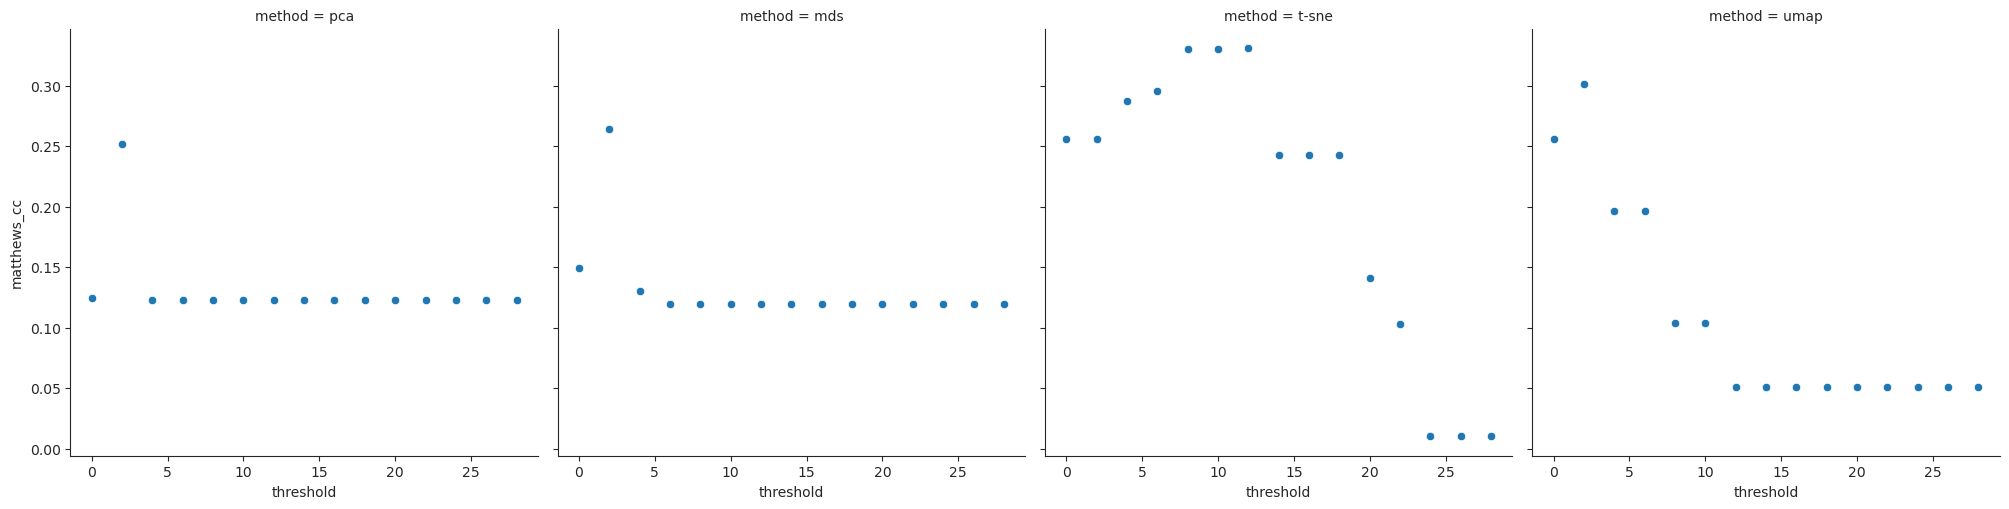

In [129]:
import seaborn as sns
sns.relplot(data=full_output_df, x="threshold", y="matthews_cc", col="method", kind="scatter")

In [130]:
max_values = []
for method in methods:
    method_dict = dict(full_output_df.groupby("method").get_group(method).iloc[full_output_df.groupby("method").get_group(method)["matthews_cc"].argmax()])
    max_values.append(method_dict)

In [131]:
max_df = pd.DataFrame(max_values)
max_df

method distance_threshold_number                       confusion_matrix  \
0    pca               pca_label_1   [[1282783, 339072], [98048, 118500]]   
1    mds              mds_label_16   [[1403545, 218310], [120585, 95963]]   
2  t-sne            t-sne_label_36  [[1434680, 187175], [110085, 106463]]   
3   umap             umap_label_46   [[1330262, 291593], [92869, 123679]]   

   matthews_cc  threshold  
0     0.252118        2.0  
1     0.264202        2.0  
2     0.331053       12.0  
3     0.301688        2.0

In [157]:
max_df.loc[max_df['method'] == "mds"]["distance_threshold_number"].values[0]

'mds_label_16'

In [148]:
list_domains = []
#dataframes_total = []
i=0
for method in methods:
    embedding_df = pd.read_csv(f"../seasonal-flu-nextstrain/results/embed_{method}_sequences.csv")
    label_name = max_df.loc[max_df['method'] == method]["distance_threshold_number"].values[0]
    domain = list(set(dataframes_total[i][label_name].values.tolist()))
    list_domains.append(domain)
    i = i+1

In [ ]:
embedding_df["strain"] = embedding_df.index

In [151]:
range_ = ['#4f61ff', '#71cfd4', '#97e59f', '#c7f071', '#f8e957', '#ffcc49', '#ff903e', '#ff3b2d', '#58a3fd', '#4f92e4', '#000000']

In [219]:
embedding_df = pd.read_csv(f"../seasonal-flu-nextstrain/results/embed_mds_sequences.csv")
embedding_df = node_df[["strain", "clade_membership", "y", "date"]].merge(embedding_df, on="strain")
print(set(embedding_df["mds_label"]))
chart1 = scatterplot_with_tooltip_interactive(embedding_df, "mds1", "mds2","mds_label","mds2",['strain', "mds_label"], "mds_label:N", np.arange(-1,20,1), range_).properties(title='mds HDBSCAN clusters')
chart1

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, -1}


alt.Chart(...)

In [163]:
i=0
for method in methods:
    columns = _get_embedding_columns_by_method(method)
    embedding_df = node_df[["strain", "clade_membership", "y", "date"]].merge(dataframes_total[i], on="strain")

    chart1 = scatterplot_with_tooltip_interactive(embedding_df, columns[0],columns[1],max_df.loc[max_df['method'] == method]["distance_threshold_number"].values[0],columns[1],['strain'],max_df.loc[max_df['method'] == method]["distance_threshold_number"].values[0], list_domains[i], range_).properties(title=f'{method} HDBSCAN clusters')
    domain = list(set(embedding_df["clade_membership"].values.tolist()))
    chart2 = scatterplot_with_tooltip_interactive(embedding_df,columns[0],columns[1],max_df.loc[max_df['method'] == method]["distance_threshold_number"].values[0],columns[1],['strain'],'clade_membership:N', domain, range_).properties(title=f'{method} clade membership')
    chart3 = chart1|chart2
    chart3.display()
    i=i+1

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

In [165]:
distance_thresholds = max_df["threshold"].values.tolist()

[2.0, 2.0, 12.0, 2.0]

In [223]:
node_df = pd.read_csv("../seasonal-flu-nextstrain-2018-2020/results/table.tsv", sep="\t")
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '../seasonal-flu-nextstrain-2018-2020/results/table.tsv'

In [224]:
full_output_test = []
dataframes_total_test = []
for i in range(0,len(methods)):
    embedding_df = pd.read_csv(f"../seasonal-flu-nextstrain-2018-2020/results/embed_{methods[i]}_sequences.csv")
    embedding_df = embedding_df.drop(f"{methods[i]}_label", axis=1)
    val_df = node_df[["strain", "clade_membership", "y", "date"]].merge(embedding_df, on="strain")
    KDE_df_normal = get_euclidean_data_frame(sampled_df=val_df, column_for_analysis="clade_membership", embedding=methods[i], column_list=_get_embedding_columns_by_method(methods[i]))

    clusterer = hdbscan.HDBSCAN(min_cluster_size=15, cluster_selection_epsilon=float(distance_thresholds[i]))
    clusterer.fit(embedding_df[_get_embedding_columns_by_method(methods[i])])
    embedding_df[f"{methods[i]}_label_{i}"] = clusterer.labels_.astype(str)
    list_columns = _get_embedding_columns_by_method(methods[i])
    list_columns.extend(["strain", f"{methods[i]}_label_{i}"])
    KDE_df_cluster = get_euclidean_data_frame(sampled_df=embedding_df.merge(node_df[["strain", "clade_membership", "y", "date"]], on="strain")[list_columns], column_for_analysis=f"{methods[i]}_label_{i}", embedding=methods[i], column_list=_get_embedding_columns_by_method(methods[i]))
    confusion_matrix_val = confusion_matrix(KDE_df_normal["clade_status"], KDE_df_cluster["clade_status"])
    matthews_cc_val = matthews_corrcoef(KDE_df_normal["clade_status"], KDE_df_cluster["clade_status"])
    method_dict = {}

    method_dict["method"] = methods[i]
    method_dict["distance_threshold_number"] = f"{methods[i]}_label_{i}"
    method_dict["confusion_matrix"] = confusion_matrix_val
    method_dict["matthews_cc"] = matthews_cc_val
    method_dict["threshold"] = distance_thresholds[i]

    full_output_test.append(method_dict)

    print(method_dict)

    i = i+1

    dataframes_total_test.append(embedding_df)


{'method': 'pca', 'distance_threshold_number': 'pca_label_0', 'confusion_matrix': array([], shape=(0, 0), dtype=int64), 'matthews_cc': 0.0, 'threshold': 0}
{'method': 'mds', 'distance_threshold_number': 'mds_label_1', 'confusion_matrix': array([], shape=(0, 0), dtype=int64), 'matthews_cc': 0.0, 'threshold': 2}
{'method': 't-sne', 'distance_threshold_number': 't-sne_label_2', 'confusion_matrix': array([], shape=(0, 0), dtype=int64), 'matthews_cc': 0.0, 'threshold': 4}
{'method': 'umap', 'distance_threshold_number': 'umap_label_3', 'confusion_matrix': array([], shape=(0, 0), dtype=int64), 'matthews_cc': 0.0, 'threshold': 6}


/home/nandsra21/anaconda3/envs/cartography/lib/python3.7/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/nandsra21/anaconda3/envs/cartography/lib/python3.7/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/nandsra21/anaconda3/envs/cartography/lib/python3.7/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/nandsra21/anaconda3/envs/cartography/lib/python3.7/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [221]:
full_output_test_df = pd.DataFrame(full_output_test)
full_output_test_df

method distance_threshold_number                 confusion_matrix  \
0    pca               pca_label_0   [[89046, 5812], [10920, 6323]]   
1    mds               mds_label_1  [[84256, 10602], [5784, 11459]]   
2  t-sne             t-sne_label_2    [[88094, 6764], [7470, 9773]]   
3   umap              umap_label_3  [[79054, 15804], [3095, 14148]]   

   matthews_cc  threshold  
0     0.354656          0  
1     0.501620          2  
2     0.504068          4  
3     0.533139          6

In [222]:
list_domains = []
#dataframes_total = []
i=0
for method in methods:
    embedding_df = pd.read_csv(f"../seasonal-flu-nextstrain-2018-2020/results/embed_{method}_sequences.csv")
    label_name = full_output_test_df.loc[full_output_test_df['method'] == method]["distance_threshold_number"].values[0]
    domain = list(set(dataframes_total_test[i][label_name].values.tolist()))
    list_domains.append(domain)
    i = i+1

KeyError: 'umap_label_3'

In [190]:
range_ = ['#4f61ff', '#71cfd4', '#97e59f', '#c7f071', '#f8e957', '#ffcc49', '#ff903e', '#ff3b2d', '#58a3fd', '#4f92e4', '#000000']

In [193]:
i=0
for method in methods:
    columns = _get_embedding_columns_by_method(method)
    embedding_df = node_df[["strain", "clade_membership", "y", "date"]].merge(dataframes_total_test[i], on="strain")

    chart1 = scatterplot_with_tooltip_interactive(embedding_df, columns[0],columns[1],full_output_test_df.loc[full_output_test_df['method'] == method]["distance_threshold_number"].values[0],columns[1],['strain', "clade_membership"],full_output_test_df.loc[full_output_test_df['method'] == method]["distance_threshold_number"].values[0], list_domains[i], range_).properties(title=f'{method} HDBSCAN clusters')
    domain = list(set(embedding_df["clade_membership"].values.tolist()))
    chart2 = scatterplot_with_tooltip_interactive(embedding_df,columns[0],columns[1],full_output_test_df.loc[full_output_test_df['method'] == method]["distance_threshold_number"].values[0],columns[1],['strain', "clade_membership"],'clade_membership:N', domain, range_).properties(title=f'{method} clade membership')
    chart3 = chart1|chart2
    chart3.display()
    i=i+1

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

In [201]:
from augur.utils import write_json
for i in range(0,len(methods)):
    label_name = full_output_test_df.loc[full_output_test_df['method'] == method]["distance_threshold_number"].values[0]
    dataframes_total_test[i].rename(columns={label_name:'HDBSCAN_clusters'}, inplace=True)
    [i])
    embedding_dict = dataframes_total_test[i].transpose().to_dict()
    write_json({"nodes": embedding_dict}, f"../seasonal-flu-nextstrain-2018-2020/results/HDBSCANClusters{methods[i]}.json")

                       strain      pca1      pca2      pca3      pca4  \
0           A/Alabama/04/2019  8.699978 -0.233197  0.556374 -0.088083   
1           A/Georgia/37/2018  8.687132 -0.232288  0.551230 -0.086241   
2     A/NorthCarolina/45/2018  8.702933 -0.233399  0.557499 -0.088451   
3     A/Massachusetts/04/2019  8.595930 -0.226375  0.522033 -0.080169   
4         A/Michigan/123/2019  8.688118 -0.232357  0.551617 -0.086376   
..                        ...       ...       ...       ...       ...   
470  A/SouthAustralia/22/2018 -1.522141  0.601948 -2.193180 -0.026642   
471          A/Chad/9833/2019  0.388840  0.414072 -2.511551 -0.225405   
472          A/Chad/9834/2019  0.388796  0.413949 -2.509786 -0.225053   
473          A/Perth/155/2018  0.518330  0.301584 -2.417163 -0.155718   
474      A/Victoria/2118/2018  1.109154  0.627714 -1.749806 -0.284965   

         pca5      pca6      pca7      pca8      pca9     pca10 pca_label_0  
0    0.127298 -0.669286  0.197695  0.151830  

In [224]:
i=0
full_output = []
KDE_df_normal = get_euclidean_data_frame(sampled_df=val_df, column_for_analysis="clade_membership", embedding="pca", column_list=['tsne_x','tsne_y'])
for distance_threshold in distance_thresholds:
    #sd = np.std(pdist(embedding_df[["tsne_x", "tsne_y"]]))
    #mean = np.mean(pdist(embedding_df[["tsne_x", "tsne_y"]]))
    #distance_threshold = (distance_threshold * sd) + mean
    distance_threshold = float(distance_threshold)
    print(distance_threshold)
    clusterer = hdbscan.HDBSCAN(min_cluster_size=15, cluster_selection_epsilon=distance_threshold)
    clusterer.fit(embedding_df[["pca1","pca2", "pca3", "pca4"]])
    embedding_df[f"pca_label_{i}"] = clusterer.labels_.astype(str)
    
    KDE_df_cluster = get_euclidean_data_frame(sampled_df=embedding_df[["strain","pca1","pca2","pca3", "pca4", f"pca_label_{i}"]], column_for_analysis=f"pca_label_{i}", embedding="pca", column_list=['pca1','pca2', 'pca3', 'pca4'])
    
    confusion_matrix_val = confusion_matrix(KDE_df_normal["clade_status"], KDE_df_cluster["clade_status"])
    matthews_cc_val = matthews_corrcoef(KDE_df_normal["clade_status"], KDE_df_cluster["clade_status"])
    method_dict = {}
            
    method_dict["method"] = "pca"
    method_dict["distance_threshold_number"] = f"pca_label_{i}"
    method_dict["confusion_matrix"] = confusion_matrix_val
    method_dict["matthews_cc"] = matthews_cc_val
    method_dict["threshold"] = distance_threshold
    
    full_output.append(method_dict)
    
    print(method_dict)
    
    i = i+1

0.0
{'method': 'pca', 'distance_threshold_number': 'pca_label_0', 'confusion_matrix': array([[1497136,  124719],
       [ 158181,   58367]]), 'matthews_cc': 0.207371788849364, 'threshold': 0.0}
2.0
{'method': 'pca', 'distance_threshold_number': 'pca_label_1', 'confusion_matrix': array([[737919, 883936],
       [     0, 216548]]), 'matthews_cc': 0.2992151344022721, 'threshold': 2.0}
4.0
{'method': 'pca', 'distance_threshold_number': 'pca_label_2', 'confusion_matrix': array([[ 279681, 1342174],
       [      0,  216548]]), 'matthews_cc': 0.15478120585991179, 'threshold': 4.0}
6.0
{'method': 'pca', 'distance_threshold_number': 'pca_label_3', 'confusion_matrix': array([[ 279681, 1342174],
       [      0,  216548]]), 'matthews_cc': 0.15478120585991179, 'threshold': 6.0}
8.0
{'method': 'pca', 'distance_threshold_number': 'pca_label_4', 'confusion_matrix': array([[ 279681, 1342174],
       [      0,  216548]]), 'matthews_cc': 0.15478120585991179, 'threshold': 8.0}
10.0
{'method': 'pca', 'dis

In [159]:
KDE_df_cluster = get_euclidean_data_frame(sampled_df=embedding_df[["strain","tsne_x","tsne_y","t-sne_label_0"]], column_for_analysis="t-sne_label_0", embedding="t-sne", column_list=['tsne_x','tsne_y'])
embedding_df_0 = embedding_df[["strain", "tsne_x","tsne_y","t-sne_label_0"]].merge(node_df[["clade_membership","strain"]], on="strain")
embedding_df_0
KDE_df_normal = get_euclidean_data_frame(sampled_df=embedding_df_0, column_for_analysis="clade_membership", embedding="t-sne", column_list=['tsne_x','tsne_y'])

matthews_corrcoef(KDE_df_normal["clade_status"], KDE_df_cluster["clade_status"])